# Introduction
Perform segmentation using Kaggle's TGS Salt Identification Challenge dataset.


TGS Salt Identification Challenge | Kaggle


U-Net [1] is used as a segmentation method.


[1] O. Ronneberger, P. Fischer, T. Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015


https://arxiv.org/pdf/1505.04597.pdf

# Setup GPU Env

In [1]:
from model import *
from data import *
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Using TensorFlow backend.
F:\Work\Anaconda\envs\gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\Work\Anaconda\envs\gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\Work\Anaconda\envs\gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\Work\Anaconda\envs\gpu\lib\site-packages\tensorflow\python\framework\dtype

### Devices

In [2]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()) # list of DeviceAttributes

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12004117339950037275
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105254400
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10124801474225477679
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


# Problem 1
Learning

## Test run original UNET sample code

In [4]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


d:\Dev\Coding\Project Folders\Python_VSCODE\DiveIntoCode\Week 25\model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
2000/2000 [==============================] - 522s - loss: 0.1853 - acc: 0.9181   
Epoch 2/5
2000/2000 [==============================] - 518s - loss: 0.1127 - acc: 0.9509   
Epoch 3/5
2000/2000 [==============================] - 517s - loss: 0.0807 - acc: 0.9654   
Epoch 4/5
2000/2000 [==============================] - 517s - loss: 0.0642 - acc: 0.9729   
Epoch 5/5
2000/2000 [==============================] - 517s - loss: 0.0548 - acc: 0.9772   


In [2]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

d:\Dev\Coding\Project Folders\Python_VSCODE\DiveIntoCode\Week 25\model.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


30/30 [==============================] - 3s 102ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

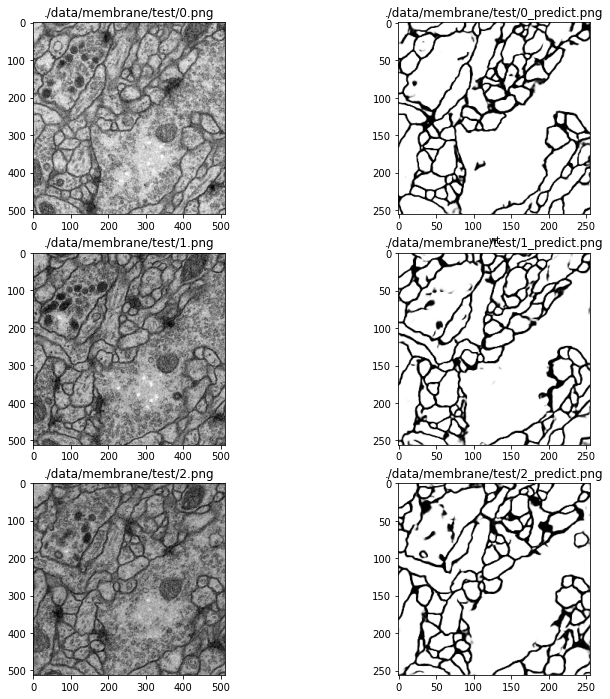

In [3]:
import matplotlib.pyplot as plt
import cv2

path = './data/membrane/test/'
img_nums = list(range(3))
n_row, n_col = 3, 2
_, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
axs[0][1].set_xlabel('wt')
for num in img_nums:
  test_name = f'{path}{num}.png'
  pred_name = f'{path}{num}_predict.png'
  test_img = cv2.imread(test_name)
  pred_img = cv2.imread(pred_name)
  ax_test = axs[num][0]
  ax_test.imshow(test_img)
  ax_pred = axs[num][1]
  ax_pred.imshow(pred_img)
  ax_test.set_title(test_name)
  ax_pred.set_title(pred_name)

plt.show()

## Now let's test run on the salt dataset

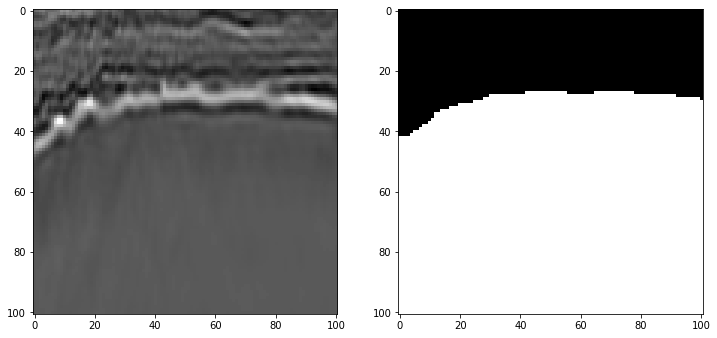

In [23]:
# !ls ./competition_data/train/masks
mask = cv2.imread('./data/competition_data/train/masks/fff987cdb3.png')
img = cv2.imread('./data/competition_data/train/images/fff987cdb3.png')
_, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(img)
axs[1].imshow(mask)
plt.show()

In [2]:
data_gen_args = {}
mySalt = trainGenerator(2, './data/competition_data/train/','images','masks',data_gen_args,save_to_dir = None)

In [3]:
#train
model = unet()
model_checkpoint = ModelCheckpoint('unet_salt.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(mySalt,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

d:\Dev\Coding\Project Folders\Python_VSCODE\DiveIntoCode\Week 25\model.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/5
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
2000/2000 [==============================] - 515s 257ms/step - loss: 0.5305 - acc: 0.7504

Epoch 00001: loss improved from inf to 0.53052, saving model to unet_salt.hdf5
Epoch 2/5
2000/2000 [==============================] - 507s 254ms/step - loss: 0.4105 - acc: 0.8100

Epoch 00002: loss improved from 0.53052 to 0.41046, saving model to unet_salt.hdf5
Epoch 3/5
2000/2000 [==============================] - 507s 254ms/step - loss: 0.3793 - acc: 0.8670

Epoch 00003: loss improved from 0.41046 to 0.37933, saving model to unet_salt.hdf5
Epoch 4/5
2000/2000 [==============================] - 507s 254ms/step - loss: 0.3533 - acc: 0.8866

Epoch 00004: loss improved from 0.37933 to 0.35330, saving model to unet_salt.hdf5
Epoch 5/5
2000/2000 [==============================] - 507s 254ms/step - loss: 0.3351 - acc: 0.8942

Epoch 00005: loss improved from 0.35330 to 0.33506, saving model to unet_salt.hdf5


### Just running sample predictions here

In [9]:
# load test
test_datagen = ImageDataGenerator()
testSalt = test_datagen.flow_from_directory(
    './data/competition_data/sample_test/',
    class_mode=None,
    target_size = (256,256),
    color_mode='grayscale'
)

Found 7 images belonging to 1 classes.


In [17]:
# test
model = unet()
model.load_weights("unet_salt.hdf5")
nb_samples = len(testSalt.filenames)
results = model.predict_generator(testSalt,steps = np.ceil(nb_samples/30),verbose=1)
saveResult("./data/competition_data/sample_test/predicts",results)


1/1 [==============================] - 0s 479ms/step


d:\Dev\Coding\Project Folders\Python_VSCODE\DiveIntoCode\Week 25\data.py:124: UserWarning: ./data/competition_data/sample_test/predicts\0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
d:\Dev\Coding\Project Folders\Python_VSCODE\DiveIntoCode\Week 25\data.py:124: UserWarning: ./data/competition_data/sample_test/predicts\2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
d:\Dev\Coding\Project Folders\Python_VSCODE\DiveIntoCode

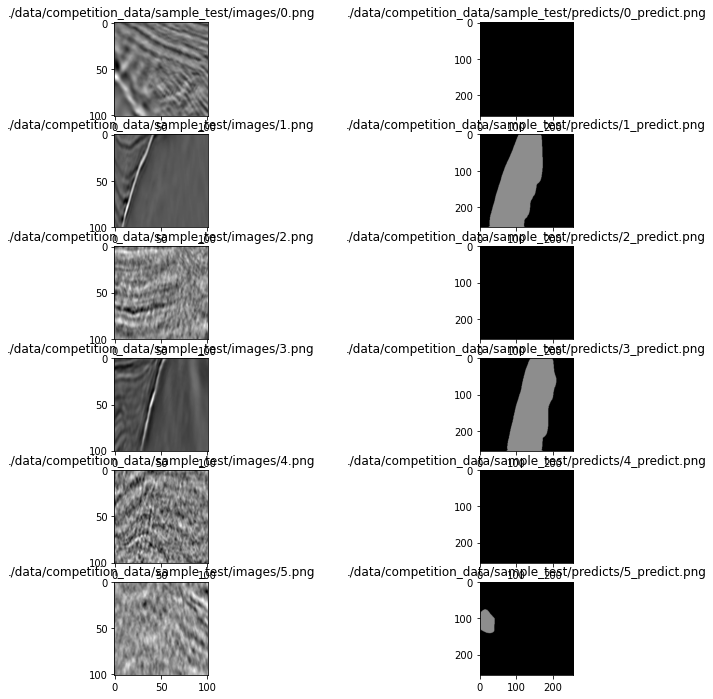

In [20]:
# show result
import matplotlib.pyplot as plt
import cv2

path = './data/competition_data/sample_test'
img_nums = list(range(6))
n_row, n_col = 6, 2
_, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
for num in img_nums:
  test_name = f'{path}/images/{num}.png'
  pred_name = f'{path}/predicts/{num}_predict.png'
  test_img = cv2.imread(test_name)
  pred_img = cv2.imread(pred_name)
  ax_test = axs[num][0]
  ax_test.imshow(test_img)
  ax_pred = axs[num][1]
  ax_pred.imshow(pred_img)
  ax_test.set_title(test_name)
  ax_pred.set_title(pred_name)

plt.show()

### Conclusion
- This exercise help me to setup GPU and also try new models
- Though i did not go deep into the competition submission, it's interesting to see the model works with my GPU

# Problem 2
Code Reading

### The model
- Encoding: Unet make use of downsampling through convolution + pooling
- Decoding: But also use upsampling for a symetric and percise output
- This encode + decode symtetric is why the model is also called "Fully Convolutional Network"

### The code
- Data related code are in `data.py` and model related is in `model.py`
- `data.py`: preprocess, generating train, test, save images,..
- `model.py`: the unet model, related imports for generating checkpoint, etc.

